# study

SEOYEON CHOI  
12/8/22

> study

# a,b,c,d,e 를 표현함에 있어서 3개의 은닉노드면 충분하다.

-   1개의 은닉노드 -\> 2개의 문자를 표현할 수 있음.
-   2개의 은닉노드 -\> 4개의 문자를 표현할 수 있음.
-   3개의 은닉노드 -\> 8개의 문자를 표현할 수 있음.

# torch.nn.RNN(4,2)는 torch.nn.RNNCell(4,2)의 batch 버전이다.

(for문이 포함된 버전이다)

# torch.nn.LSTM에서 batch size

batch size = 전체데이터는 몇 개의 시계열이 있는지 = 전체 데이터를 몇개의
시계열로 쪼갤지

-   fastai, Dataloader의 batchsize 는 한 뭉치에 몇 개 있는지

# 원래 1은 단순히 observation의 차원이 아니다. 즉 $x_{n \times p}$ 에서 $n$에 대응하는 차원으로 생각할 수 없다.

-   그런데 (1) 단방향 (2) 조각내지 않은 시계열 (3) 중첩하지 않은
    순환망에 한정하여서는 observation 처럼 생각해도 무방하다.

-   현실적으로 (1)-(3)이 아닌 조건에서는 Cell 단위로 연산을 이용할 일이
    없다. (느리거든요) // 그냥 이해용으로 구현

-   torch.nn.RNN 혹은 torch.nn.LSTM 으로 네트워크를 구성할시 \_water의
    dim을 명시할 일도 없다.

-   오로지 고려해야 할 것은 입력시계열을 조각낼지 조각내지 않을지

In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

In [4]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 

In [5]:
txt = list('ab')*100
txt_x = txt[:-1]
txt_y = txt[1:]

In [6]:
mapping = {'a':[1,0],'b':[0,1]}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,2)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,2)

In [7]:
class mynet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 사용할 레이어를 정의 
        self.l1 = torch.nn.Linear(in_features=2,out_features=1,bias=True)
        self.a1 = torch.nn.Tanh()
        self.l2 = torch.nn.Linear(in_features=1,out_features=2,bias=False)
        ## 레이어 정의 끝
    def forward(self,x):
        ## yhat을 어떻게 구할것인지 정의 
        yhat = self.l2(self.a1(self.l1(x)))
        ## 정의 끝
        return yhat

In [8]:
net = mynet()

In [9]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [10]:
for epoc in range(5000):
    yhat = net(x)
    loss = loss_fn(yhat,y)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

## 임베딩

In [11]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 0, 1, 0]), tensor([1, 0, 1, 0, 1]))

In [12]:
class mynet2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 사용할 레이어를 정의 
        self.l1 = torch.nn.Embedding(num_embeddings=2,embedding_dim=1)
        self.a1 = torch.nn.Tanh()
        self.l2 = torch.nn.Linear(in_features=1,out_features=2)
        ## 레이어 정의 끝
    def forward(self,x):
        ## yhat을 어떻게 구할것인지 정의 
        yhat = self.l2(self.a1(self.l1(x)))
        ## 정의 끝
        return yhat

In [13]:
net = mynet2()

In [14]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [15]:
for epoc in range(5000):
    yhat = net(x)
    loss = loss_fn(yhat,y)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

## 두 개의 은닉노드 이용

In [16]:
txt = list('abcd')*100
txt_x = txt[:-1]
txt_y = txt[1:]

In [17]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

In [18]:
l1=torch.nn.Embedding(num_embeddings=4,embedding_dim=2)

In [19]:
a1 = torch.nn.Tanh()

In [20]:
l2 = torch.nn.Linear(in_features=2,out_features=4)

In [21]:
net = torch.nn.Sequential(
    l1,a1,l2)

In [22]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [23]:
for epoc in range(5000):
    yhat=net(x)
    loss = loss_fn(yhat,y)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

In [24]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

In [25]:
net[:-1]

Sequential(
  (0): Embedding(4, 2)
  (1): Tanh()
)

결과 시각화 코드 10주

## 순환신경망 Class 사용 RNN

10주

In [26]:
txt = list('AbAcAd')*100
txt_x = txt[:-1]
txt_y = txt[1:]
x = torch.tensor(f(txt_x,{'A':0,'b':1,'c':2,'d':3}))
y = torch.tensor(f(txt_y,{'A':0,'b':1,'c':2,'d':3}))
x= torch.nn.functional.one_hot(x).float()
y= torch.nn.functional.one_hot(y).float()

In [27]:
class rNNCell(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Linear(4,2) 
        self.h2h = torch.nn.Linear(2,2) 
        self.tanh = torch.nn.Tanh()
    def forward(self,x,hidden):
        hidden = self.tanh(self.i2h(x)+self.h2h(hidden))
        return hidden

In [28]:
torch.manual_seed(43052)
rnncell = rNNCell()

In [29]:
torch.manual_seed(43052)
cook = torch.nn.Linear(2,4) 

In [30]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(rnncell.parameters())+list(cook.parameters()))

In [31]:
T = len(x) 
for epoc in range(100): 
    ## 1~2
    loss = 0 
    ht = torch.zeros(1,2) 
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht = rnncell(xt,ht) 
        ot = cook(ht) 
        loss = loss + loss_fn(ot,yt) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

시각화코드는 10주_순환신경망구현1-성공에

## 순환신경망 RNN

In [32]:
txt = list('AbAcAd')*100
txt_x = txt[:-1]
txt_y = txt[1:]
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,{'A':0,'b':1,'c':2,'d':3}))).float()
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,{'A':0,'b':1,'c':2,'d':3}))).float()

In [33]:
torch.manual_seed(2) #1 
rnn = torch.nn.RNN(4,3).to("cuda:0") 
cook = torch.nn.Linear(3,4).to("cuda:0")

In [34]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnn.parameters())+list(cook.parameters()))

In [35]:
_water = torch.zeros(1,3).to("cuda:0") 
for epoc in range(500):
    ## 1
    hidden,hT = rnn(x.to("cuda:0"),_water) 
    output = cook(hidden) 
    ## 2 
    loss = loss_fn(output,y.to("cuda:0")) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [36]:
yhat = soft(output)

## 순환신경망 Class 사용 LSTM

In [37]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]
mapping = {'!':0, '?':1,'h':2,'i':3,'e':4,'l':5,'o':6} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

In [38]:
class lSTMCell(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Linear(7,16)
        self.h2h = torch.nn.Linear(4,16) 
        self.tanh = torch.nn.Tanh()
    def forward(self,xt,past):
        ht,ct = past 
        ifgo = self.i2h(xt) + self.h2h(ht) 
        it = sig(ifgo[0:4])
        ft = sig(ifgo[4:8])
        gt = tanh(ifgo[8:12])
        ot = sig(ifgo[12:16])
        ct = ft*ct + it*gt
        ht = ot*self.tanh(ct) 
        return ht,ct

In [39]:
lstmcell = lSTMCell().to("cuda:0")
linr = torch.nn.Linear(4,7).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstmcell.parameters())+list(linr.parameters()),lr=0.1)

In [40]:
# 초기값셋팅
torch.manual_seed(43052) 
_lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0")
_linr = torch.nn.Linear(4,7).to("cuda:0")
lstmcell.i2h.weight.data = _lstmcell.weight_ih.data 
lstmcell.h2h.weight.data = _lstmcell.weight_hh.data 
lstmcell.i2h.bias.data = _lstmcell.bias_ih.data
lstmcell.h2h.bias.data = _lstmcell.bias_hh.data
linr.weight.data = _linr.weight.data 
linr.bias.data = _linr.bias.data 

In [41]:
for epoc in range(10):
    ## 1
    hidden = []     
    ht = torch.zeros(4).to("cuda:0")
    ct = torch.zeros(4).to("cuda:0")
    for xt,yt in zip(x,y): 
        ht,ct = lstmcell(xt,(ht,ct))
        hidden.append(ht) 
    hidden = torch.stack(hidden)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [42]:
yhat = soft(output)

In [43]:
yhat

tensor([[0.0909, 0.0859, 0.0356,  ..., 0.1820, 0.2308, 0.1257],
        [0.3443, 0.1629, 0.2108,  ..., 0.1008, 0.0506, 0.0774],
        [0.3998, 0.0325, 0.5100,  ..., 0.0133, 0.0269, 0.0119],
        ...,
        [0.0655, 0.0525, 0.0455,  ..., 0.1652, 0.2569, 0.2828],
        [0.3850, 0.0844, 0.3754,  ..., 0.0464, 0.0423, 0.0478],
        [0.4012, 0.0217, 0.5328,  ..., 0.0084, 0.0254, 0.0065]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)

## 순환신경망 LSTM

In [44]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]
mapping = {',':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5} 
txt_x = txt[:-1]
txt_y = txt[1:] 
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

In [45]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(6,20).to("cuda:0") 
linr = torch.nn.Linear(20,6).to("cuda:0") 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [46]:
_water = torch.zeros(1,20).to("cuda:0")
for epoc in range(50):
    ## 1 
    hidden, (hT,cT) =lstm(x,(_water,_water))
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()     

In [48]:
soft(output)

tensor([[9.9875e-01, 1.5434e-06, 6.5715e-04, 1.8973e-05, 9.5753e-05, 4.7651e-04],
        [3.0184e-06, 3.7971e-05, 9.8694e-01, 3.6741e-03, 3.6129e-04, 8.9867e-03],
        [9.9999e-01, 2.9932e-06, 5.9745e-07, 8.3266e-06, 1.0668e-07, 4.8888e-07],
        ...,
        [3.9604e-05, 8.6161e-06, 1.5918e-03, 1.1244e-07, 9.9808e-01, 2.7556e-04],
        [9.9993e-01, 3.3252e-07, 9.5155e-06, 4.8129e-07, 2.7274e-05, 3.2102e-05],
        [8.0918e-07, 8.0716e-03, 5.9763e-04, 7.7044e-05, 6.8931e-05, 9.9118e-01]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)

### 조각난 시계열

12주차

In [121]:
txt = list('hi!')*3 + list('hi?')*3
txt_x = txt[:-1] 
txt_y = txt[1:] 
mapping = {'!':0, '?':1, 'h':2, 'i':3} 
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0") 

In [122]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [123]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [124]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(x) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

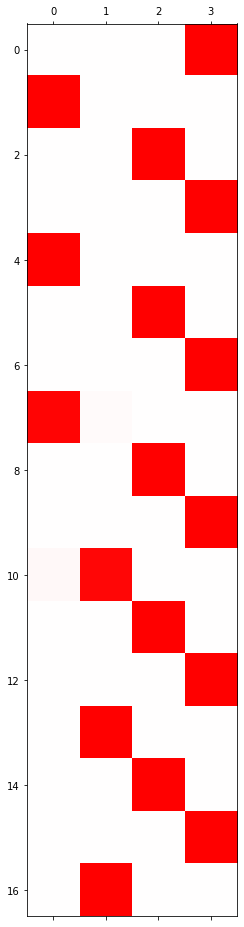

In [125]:
hidden, _ = lstm(x)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

In [130]:
txt = list('hi!')*3 + list('hi?')*3
txt1= txt[:9]
txt2= txt[9:]
txt1_x = txt1[:-1] 
txt1_y = txt1[1:] 
txt2_x = txt2[:-1] 
txt2_y = txt2[1:] 
mapping = {'!':0, '?':1, 'h':2, 'i':3} 
x1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_x,mapping))).float().to("cuda:0")
y1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_y,mapping))).float().to("cuda:0")
x2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_x,mapping))).float().to("cuda:0")
y2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_y,mapping))).float().to("cuda:0")
xx = torch.stack([x1,x2],axis=1)
yy = torch.stack([y1,y2],axis=1)

In [131]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [132]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [133]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(xx) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output[:,0,:],yy[:,0,:]) + loss_fn(output[:,1,:],yy[:,1,:])
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

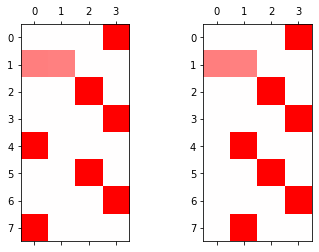

In [134]:
fig , ax = plt.subplots(1,2) 
ax[0].matshow(soft(output[:,0,:]).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)
ax[1].matshow(soft(output[:,1,:]).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)